In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pow
from random import random
import findspark

os.environ["SPARK_HOME"] = '/opt/apache-spark/spark-3.0.1-bin-hadoop2.7'
findspark.init()

import pyspark
from pyspark.ml.regression import LinearRegression
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors


# Prepare Environment

In [2]:
#run on local with 2 core
spark = SparkSession.builder.appName("examples").master('local[2]').getOrCreate()

# Common Function

In [3]:
#create polynomial feature for x: x,x^2,x^3.....x^n
def create_polynomial_feature(x,n):
    return list(map(lambda p:pow(x,p),range(1,n+1)))
#function of y from x
y_func = lambda x:pow(x,3)-1.8*pow(x,2)+x+random()*0.05

# Prapare Training data

In [4]:
#dimension of polnomial
dim = 2
x = np.arange(0.0,1.0,0.01)
y = np.array(list(map(y_func,x)))
# need to convert to spark vector for training
x_features_func = lambda x:Vectors.dense(create_polynomial_feature(x,dim))
x_train = list(map(x_features_func,x))
df=pd.DataFrame ({"x": x_train, "y": y})
train_data =  spark.createDataFrame(df,schema=["features", "label"])

# Train Model

In [5]:
lr =  LinearRegression()
model = lr.fit(train_data)

# Prepare predict data

In [6]:
x_predict = np.arange(0.0,1.0,0.001)
y_predict = np.array(list(map(lambda x:model.predict(x_features_func(x)),x_predict)))

# Show Result

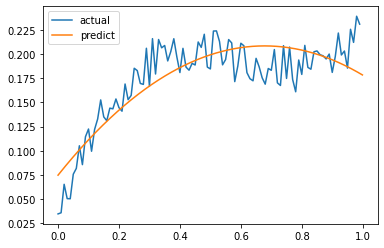

In [7]:
plt.plot(x,y,label='actual')
plt.plot(x_predict,y_predict,label='predict')
plt.legend()
plt.show()